# Fourier Transformation

In this notebook we will learn how to apply the Fourier Transformation in Python.

The Fourier Transformation is a time-frequency conversion, based on the fourier series.(?)
It is a transformation from e.g. time into freqeuncy domain.

Key words:
- Sinus and Cosine
- Amplitude and phase spectrum 
- Nyquist


Explain: Nyquist

What about phase spectrum?????





In [1]:
import numpy as num
import scipy as sp
import matplotlib.pyplot as plt

In [2]:
df = 100  # Sampling frequency [Hz]
timelen = 10  # Data length [s]
dt = 1 / df  # Sampling interval [s]

numsamples = timelen * df
x = num.arange(numsamples) / df
#print(x)

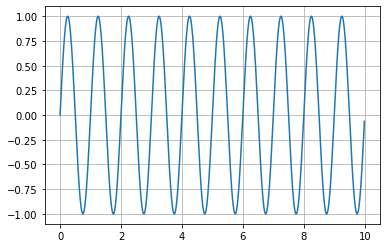

In [3]:
fr1 = 1 # frequency of signal  [Hz], inverse of periode
ydata = num.sin(2 * num.pi * fr1 * x) #+ num.random.normal(0, 0.1, len(x))

plt.figure()
plt.plot(x, ydata)
plt.grid()
plt.show()

For the Fourier Transform, we can use the either the 'rfft' (real values only) or 'fft' (full spectra, with imaginary values). For most cases the rfft is sufficient. 

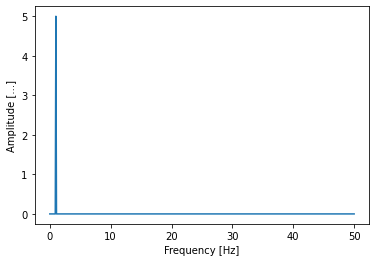

In [4]:
# Apply the ft - fft stands for fast-fourier-transform
ft = num.fft.rfft(ydata)

# To get the amplitude spectrum, only the real values are of interest - absolute
amps = abs(ft) * dt

# Creating the corresponding frequencies
freqs = num.fft.rfftfreq(numsamples, d=dt)

plt.figure()
plt.plot(freqs, amps)
#plt.semilogx(freqs, amps)
#plt.loglog(freqs, amps)
plt.xlabel('Frequency [Hz]')
plt.ylabel('Amplitude [...]')
plt.show()


Additionally the fourier transformation produces the amplitude spectrum and the phase spectrum. In most of the cases the phase information is not relevant. In general, its interpretation is hard. Therefore it is often neglected and if one mentions fourier spectrum the amplitude spectrum is meant. 

In [5]:
# phase =  num.angle(ft)
# plt.figure()
# plt.plot(freqs, phase / num.pi)
# plt.show()

# plt.figure()
# plt.phase_spectrum(ydata, Fs=1/dt)
# plt.show()

# Different frequencies
### Taks:
- Play with the frequency of the sinus and the see the changes in the spectrum.

Take into account that the valid frequencies depend on your data.

- The highest possible frequency that can be displayed depends on the sampling rate. Here the Nyquist(-Shannon)-Theorem plays an important role. In short: frequencies higher than half of your sampling rate cannot be displayed correctly. That is why your x-axis is this example only shows maximum 50 Hz (df/2). [LINK zu einer detailierteren Erklärung]
-> Try frequencies: e.g. 40 and 60 Hz

- The lowest possible frequency depends on the length of your data.
-> Try frequencies: lower than 0.1 Hz

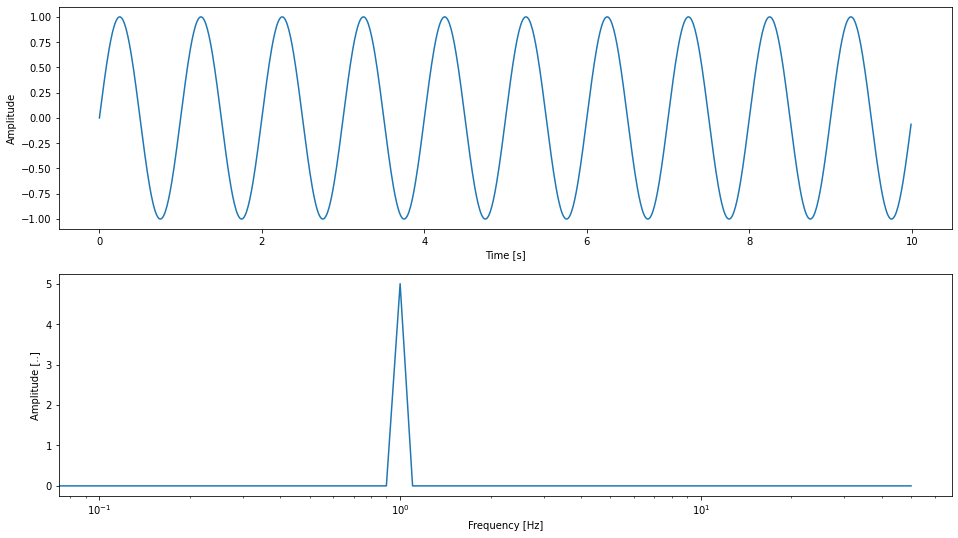

In [6]:
fr1 = 1 # frequency of signal  [Hz]
ydata = num.sin(2 * num.pi * fr1 * x)

amps = abs(num.fft.rfft(ydata)) * dt
freqs = num.fft.rfftfreq(numsamples, d=dt)

plt.figure(figsize=(16, 9))
ax = plt.subplot(2, 1, 1)
ax.plot(x, ydata)
ax.set_xlabel('Time [s]')
ax.set_ylabel('Amplitude')

ax = plt.subplot(2, 1, 2)
#ax.plot(freqs, amps)
ax.semilogx(freqs, amps)
#ax.loglog(freqs, amps)
ax.set_xlabel('Frequency [Hz]')
ax.set_ylabel('Amplitude [..]')
plt.show()

# Multiple Frequencies
The fft shows its full potential when the signal cannot be directly distuiged by us. This can happend when multiple signals overlay each other.

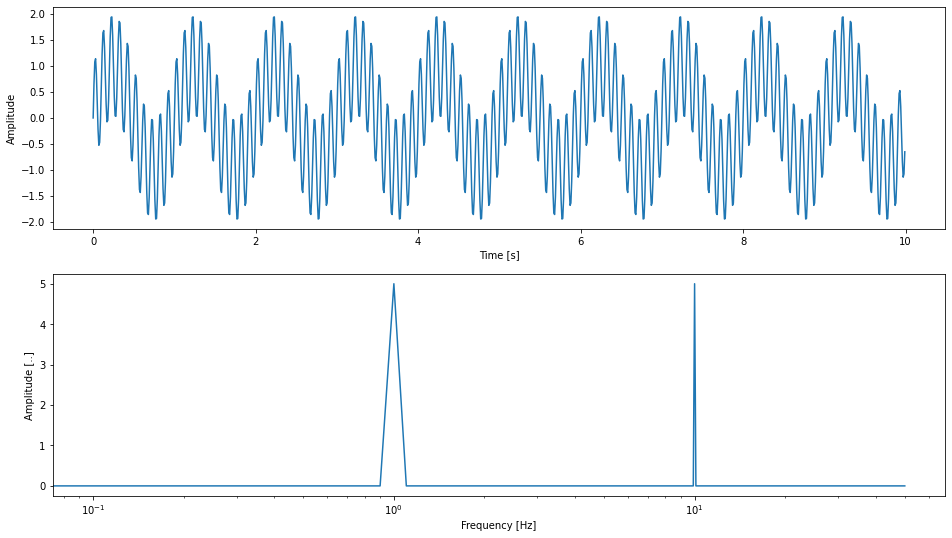

In [7]:
fr1 = 1.
fr2 = 10.
ydata = num.sin(2 * num.pi * fr1 * x) + num.sin(2 * num.pi * fr2 * x)

ft = num.fft.rfft(ydata)

amps = abs(ft) * dt
freqs = num.fft.rfftfreq(numsamples, d=dt)

plt.figure(figsize=(16, 9))
ax = plt.subplot(2, 1, 1)
ax.plot(x, ydata)
ax.set_xlabel('Time [s]')
ax.set_ylabel('Amplitude')

ax = plt.subplot(2, 1, 2)
#ax.plot(freqs, amps)
ax.semilogx(freqs, amps)
#ax.loglog(freqs, amps)
ax.set_xlabel('Frequency [Hz]')
ax.set_ylabel('Amplitude [..]')
plt.show()

The fft does not distinguish between cosine and sinus, as it only evaluates the frequency content of a signal, independent of its origin. Meaning two different wavesforms can produce the same amplitude spectrum. The difference are in their phase spectra.
### Taks
- change the sinus and cosine
- add noise to the data

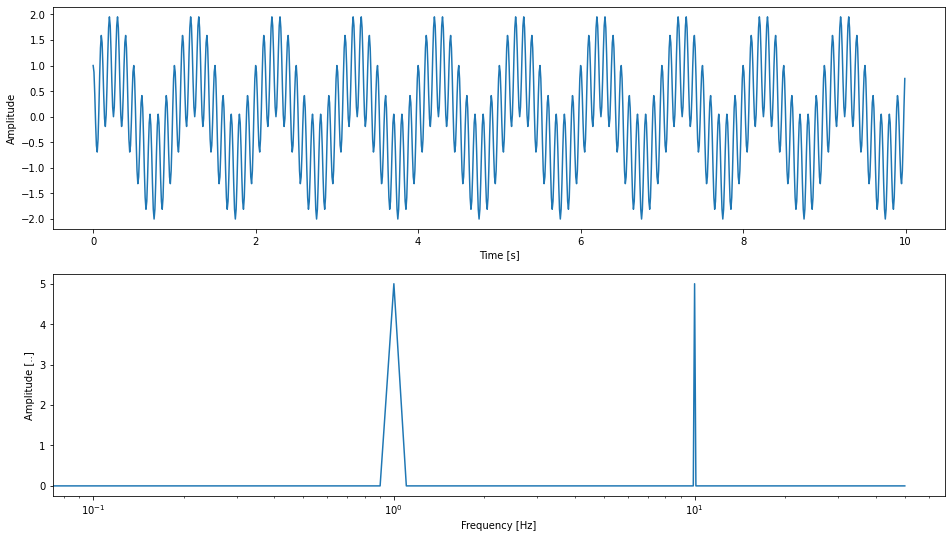

In [8]:
fr1 = 1.
fr2 = 10.
ydata = num.sin(2 * num.pi * fr1 * x) + num.cos(2 * num.pi * fr2 * x)

ft = num.fft.rfft(ydata)

amps = abs(ft) * dt
freqs = num.fft.rfftfreq(numsamples, d=dt)

plt.figure(figsize=(16, 9))
ax = plt.subplot(2, 1, 1)
ax.plot(x, ydata)
ax.set_xlabel('Time [s]')
ax.set_ylabel('Amplitude')

ax = plt.subplot(2, 1, 2)
#ax.plot(freqs, amps)
ax.semilogx(freqs, amps)
#ax.loglog(freqs, amps)
ax.set_xlabel('Frequency [Hz]')
ax.set_ylabel('Amplitude [..]')
plt.show()

# Specials
In the following some special case are shown to demonstrate what the fft is capable of.
E.g. 
- a peak in time corresponds to a horizontal line in frequency (all frequencies)

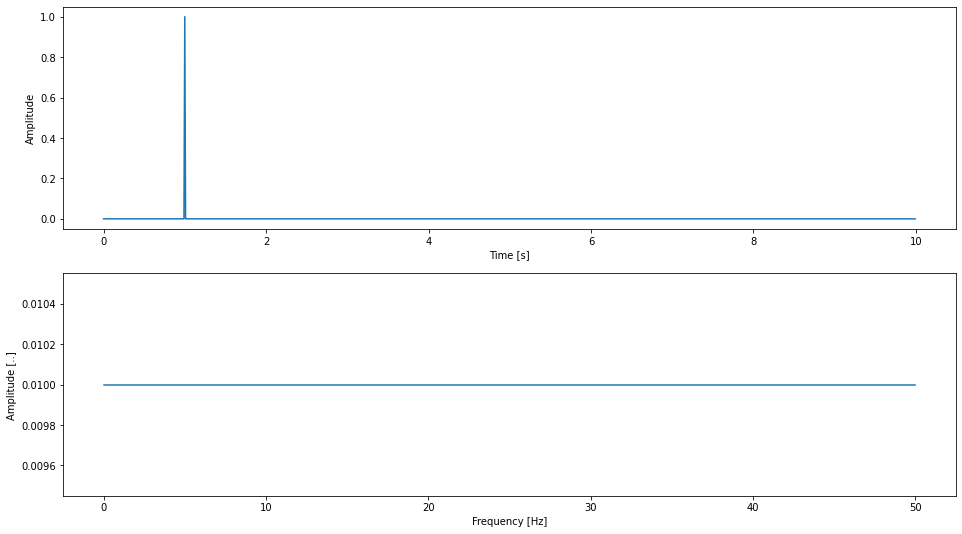

In [9]:
# Creating a array full of zeros
ydata = num.zeros(numsamples)

## single peak
# ydata[99] = 0.5
ydata[100] = 1
# ydata[101] = 0.5

## box
# ydata[100:200] = 1

ft = num.fft.rfft(ydata)

amps = abs(ft) * dt
freqs = num.fft.rfftfreq(numsamples, d=dt)

plt.figure(figsize=(16, 9))
ax = plt.subplot(2, 1, 1)
ax.plot(x, ydata)
ax.set_xlabel('Time [s]')
ax.set_ylabel('Amplitude')

ax = plt.subplot(2, 1, 2)
ax.plot(freqs, amps)
#ax.semilogx(freqs, amps)
#ax.loglog(freqs, amps)
ax.set_xlabel('Frequency [Hz]')
ax.set_ylabel('Amplitude [..]')

plt.show()

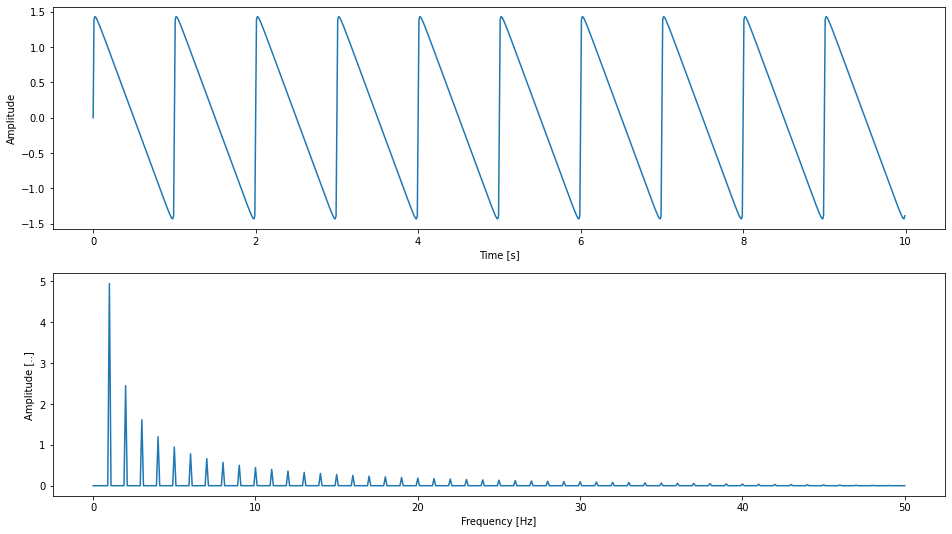

In [10]:
frequencies = num.linspace(1, 100, 100)
# print(frequencies)

ydata = num.zeros(numsamples)
for ff in frequencies:
    ydata += (1/ff) * num.sin(2 * num.pi * ff * x)
    #ysignal += ff * num.sin(2 * num.pi * ff * x)

ft = num.fft.rfft(ydata)
amps = abs(ft) * dt
freqs = num.fft.rfftfreq(numsamples, d=dt)

plt.figure(figsize=(16, 9))
ax = plt.subplot(2, 1, 1)
ax.plot(x, ydata)
ax.set_xlabel('Time [s]')
ax.set_ylabel('Amplitude')

ax = plt.subplot(2, 1, 2)
ax.plot(freqs, amps)
#ax.semilogx(freqs, amps)
#ax.loglog(freqs, amps)
ax.set_xlabel('Frequency [Hz]')
ax.set_ylabel('Amplitude [..]')

plt.show()